In [24]:
import numpy as np
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
%matplotlib inline

In [27]:
df = pd.read_csv("Ecommerce_Customers.csv")

In [28]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [30]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [31]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

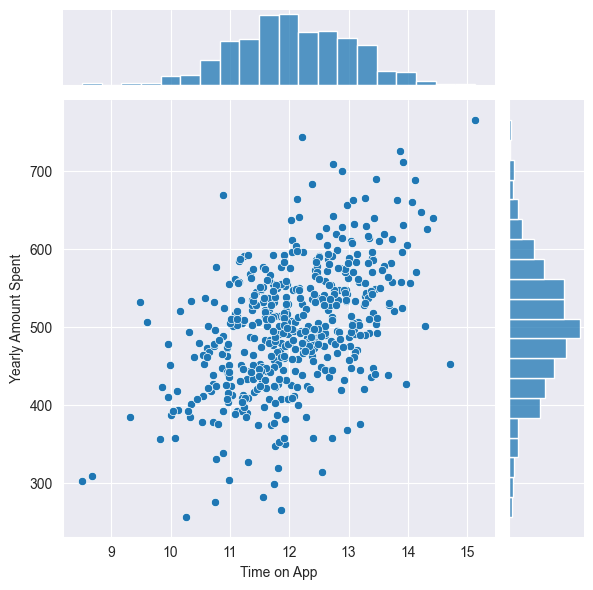

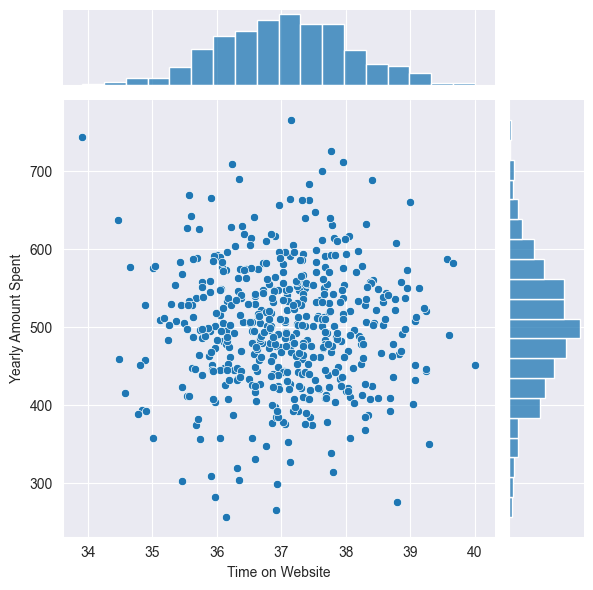

In [32]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df)
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df)

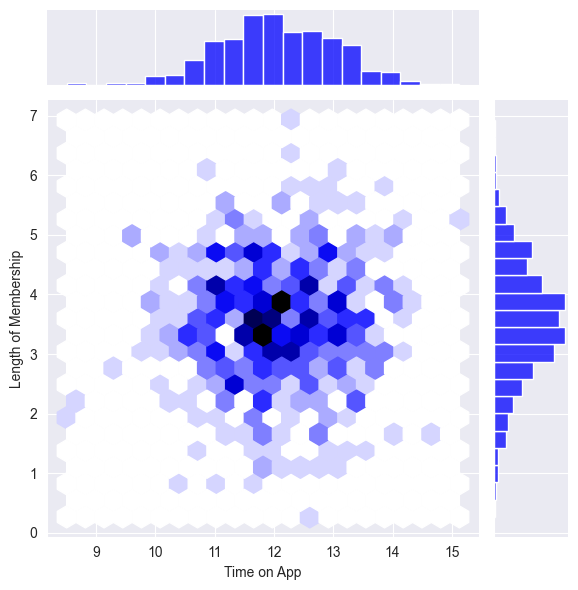

In [33]:
sns.jointplot(x="Time on App", y="Length of Membership", kind="hex", data=df, color="blue")

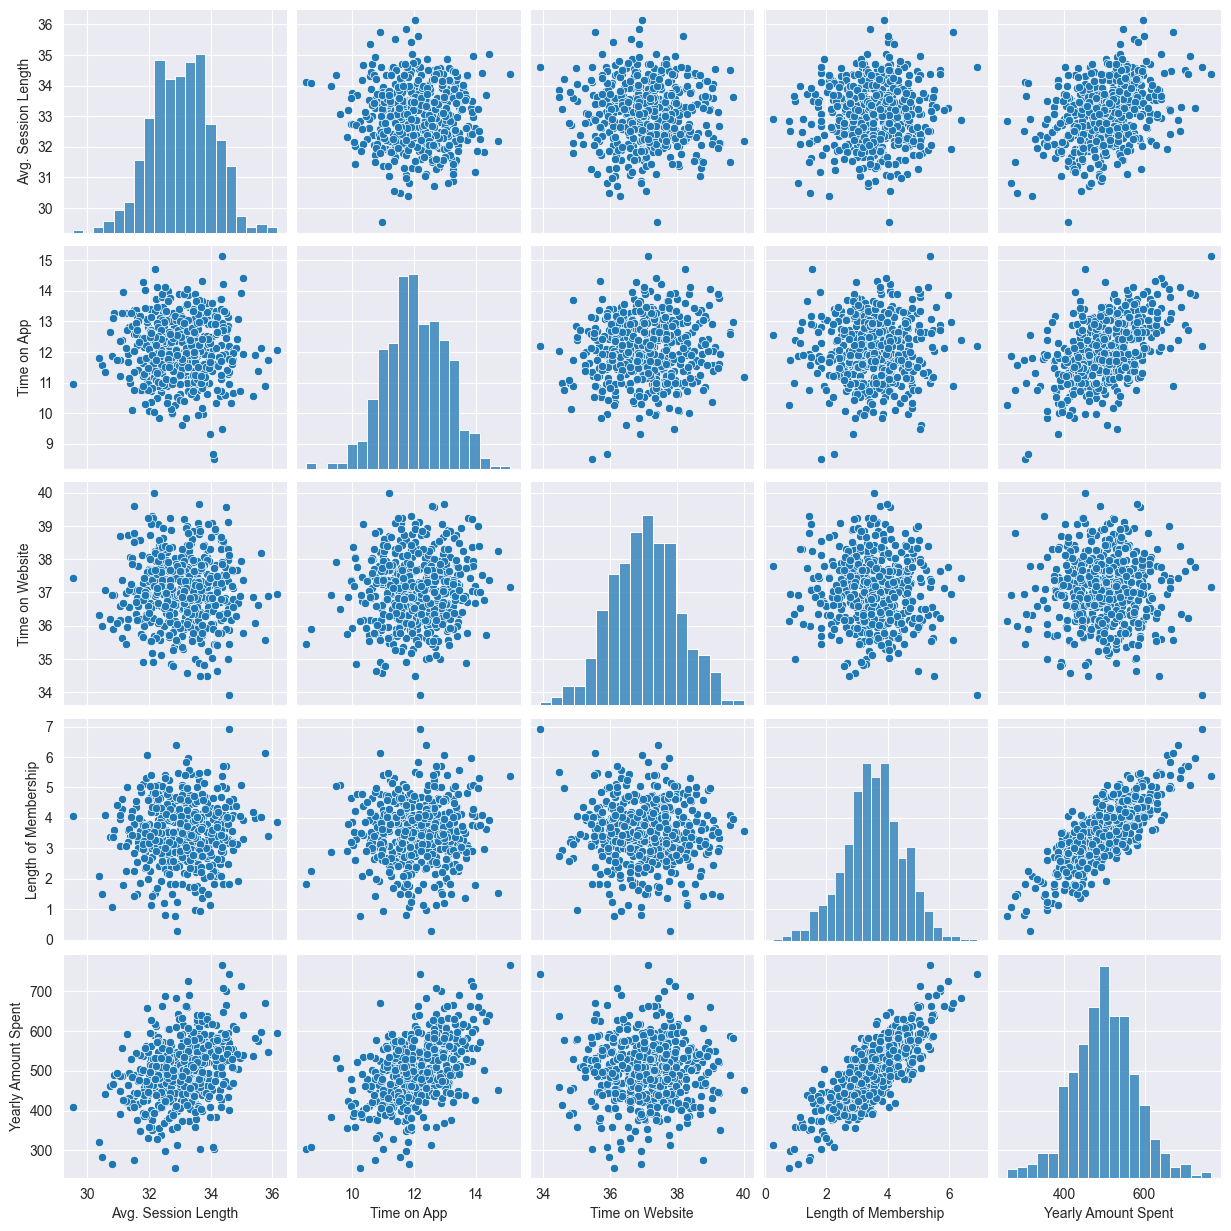

In [34]:
sns.pairplot(df)

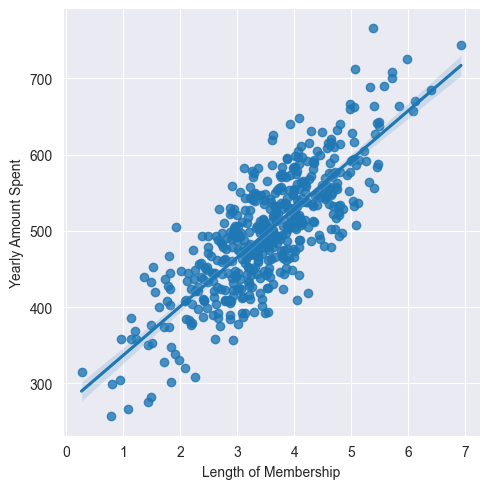

In [46]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [52]:
x = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = df["Yearly Amount Spent"]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
lm.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [59]:
predictions = lm.predict(X_test)
predictions

array([454.37723888, 404.73920978, 410.6595358 , 591.19506767,
       590.48315271, 548.36329288, 576.56306627, 714.33230591,
       473.38888194, 546.20504453, 337.81423895, 498.63394109,
       552.79850714, 409.38698955, 763.56451897, 545.52471174,
       692.7459104 , 506.98519519, 571.624283  , 571.90629207,
       399.40384444, 554.4054445 , 457.04689994, 482.8550335 ,
       558.73802831, 414.15555804, 531.42618835, 376.62194862,
       533.90120117, 448.965154  , 594.41178964, 665.0233714 ,
       510.46683218, 572.98826802, 504.92594732, 566.11964751,
       460.38877433, 449.63854229, 421.25198379, 455.88005155,
       598.58823933, 451.01415921, 615.37728001, 511.63641531,
       503.39568893, 514.48995368, 568.69756516, 550.83947274,
       357.45919981, 464.41300621, 482.16508565, 534.17837065,
       256.09807621, 505.9056379 , 521.71659105, 314.22344754,
       502.95939205, 388.72205109, 473.26753359, 431.84002404,
       539.25280219, 589.21369338, 752.24896074, 558.19

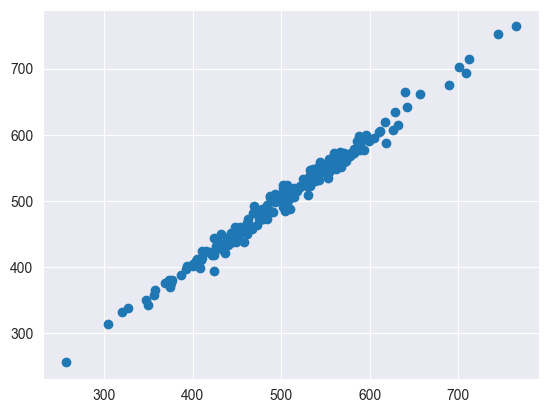

In [61]:
plt.scatter(y_test, predictions)

In [62]:
from sklearn import metrics

In [63]:
metrics.mean_absolute_error(y_test, predictions)

7.742671285838756

In [64]:
metrics.mean_squared_error(y_test, predictions)

93.83297800820064

In [65]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(9.686742383701583)

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

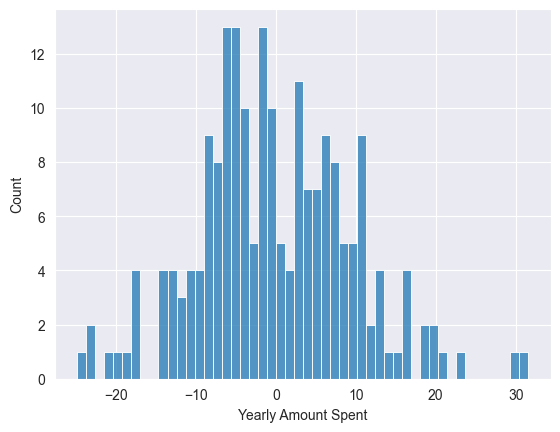

In [67]:
sns.histplot((y_test - predictions), bins=50)

In [70]:
coefficients = pd.DataFrame(lm.coef_,x.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594
